In [1]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')
import statistics
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'



In [2]:
hbo_data = pd.read_csv('data/hbo_data.csv')

In [3]:
display(hbo_data.head(3))
display(hbo_data.describe())
display(hbo_data.info())
print(hbo_data.shape)

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,517328.0,"DK, FI, NO, SE"
1,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,443986.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."
2,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1104543.0,"AG, AR, BB, BO, BS, BZ, CL, CO, CR, DO, EC, GT..."


,releaseYear,imdbAverageRating,imdbNumVotes
count,5735.000000,5321.000000,5.321000e+03
mean,2013.763208,6.662902,6.937265e+04
std,11.969007,1.041117,1.936380e+05
min,1903.000000,1.500000,5.000000e+00
25%,2010.000000,6.000000,3.000000e+02
50%,2018.000000,6.700000,2.360000e+03
75%,2021.000000,7.400000,4.013500e+04
max,2025.000000,9.400000,2.961822e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5749 entries, 0 to 5748
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               5521 non-null   object 
 1   type                5749 non-null   object 
 2   genres              5626 non-null   object 
 3   releaseYear         5735 non-null   float64
 4   imdbId              5386 non-null   object 
 5   imdbAverageRating   5321 non-null   float64
 6   imdbNumVotes        5321 non-null   float64
 7   availableCountries  5749 non-null   object 
dtypes: float64(3), object(5)
memory usage: 359.4+ KB


None

(5749, 8)


## Cleaning

In [4]:
hbo_data.head()
#rename columns
#separete genres, available countries
#check to see the type of shows present -> separate if needed
#remove imdbldlb
#deal with null values

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,517328.0,"DK, FI, NO, SE"
1,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,443986.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."
2,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1104543.0,"AG, AR, BB, BO, BS, BZ, CL, CO, CR, DO, EC, GT..."
3,A History of Violence,movie,"Action, Crime, Drama",2005.0,tt0399146,7.4,259136.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
4,2001: A Space Odyssey,movie,"Adventure, Sci-Fi",1968.0,tt0062622,8.3,735455.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."


In [5]:
hbo_cleaning = hbo_data.copy()
hbo_cleaning = hbo_cleaning.rename(columns={ 
    'imdbAverageRating': 'rating', 'imdbNumVotes': 'num_of_votes',
   'availableCountries': 'available_Countries', 
    'releaseYear': 'release_Year', 'imdbId': 'tconst'
})

hbo_cleaning.columns = [x.lower() for x in hbo_cleaning.columns]

hbo_cleaning.head(3)

,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,517328.0,"DK, FI, NO, SE"
1,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,443986.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."
2,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1104543.0,"AG, AR, BB, BO, BS, BZ, CL, CO, CR, DO, EC, GT..."


In [6]:
# Import and merge IMDB data
rating = pd.read_csv('data/title.ratings.tsv', sep='\t')
genre = pd.read_csv('data/title.basics.tsv', sep='\t')

#tv_no_null = pd.merge(rating, tv_cleaning, on='tconst', how='inner')
display(genre.head(3))
display(rating.head(3))

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"


,tconst,averageRating,numVotes
0,tt0000001,5.7,2100
1,tt0000002,5.6,282
2,tt0000003,6.5,2119


In [7]:
display(hbo_cleaning[hbo_cleaning.isna().any(axis=1)])
#delete null values with no name
#df = df.dropna(how='any',axis=0) 
#can delete

,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
960,Siste trikk,movie,NaN,2024.0,NaN,NaN,NaN,"AG, BB, BS, HN, NI, TT, US"
993,Breathe without Water,movie,NaN,2024.0,NaN,NaN,NaN,US
1038,X,movie,"Thriller, Horror",2024.0,NaN,NaN,NaN,"BA, HR, MD, ME, MK, SI, SK, US"
1718,Bita e os Animais,movie,Animation,2014.0,NaN,NaN,NaN,BR
1722,Hello Ladies: The Movie,movie,"Comedy, TV Movie",2014.0,NaN,NaN,NaN,"AD, AG, AR, BA, BB, BE, BG, BO, BR, BS, BZ, CL..."
...,...,...,...,...,...,...,...,...
5744,NaN,tv,Drama,NaN,NaN,NaN,NaN,"AD, BA, BE, BG, CZ, DK, FI, FR, HR, HU, MC, MD..."
5745,NaN,tv,NaN,2024.0,NaN,NaN,NaN,"AD, AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO..."
5746,NaN,tv,NaN,2009.0,NaN,NaN,NaN,"AR, BO, BR, CL, CO, CR, DO, EC, GT, HN, MX, NI..."
5747,NaN,tv,NaN,2024.0,NaN,NaN,NaN,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."


In [8]:
# Dealing with null values
display(hbo_cleaning[hbo_cleaning.isna().any(axis=1)].head())
hbo_cleaning_na = hbo_cleaning.dropna(axis=0, subset=['title'], how='any')
display(hbo_cleaning_na.head())
#trial = hbo_cleaning_na

,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
960,Siste trikk,movie,NaN,2024.0,NaN,NaN,NaN,"AG, BB, BS, HN, NI, TT, US"
993,Breathe without Water,movie,NaN,2024.0,NaN,NaN,NaN,US
1038,X,movie,"Thriller, Horror",2024.0,NaN,NaN,NaN,"BA, HR, MD, ME, MK, SI, SK, US"
1718,Bita e os Animais,movie,Animation,2014.0,NaN,NaN,NaN,BR
1722,Hello Ladies: The Movie,movie,"Comedy, TV Movie",2014.0,NaN,NaN,NaN,"AD, AG, AR, BA, BB, BE, BG, BO, BR, BS, BZ, CL..."


,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,517328.0,"DK, FI, NO, SE"
1,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,443986.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."
2,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1104543.0,"AG, AR, BB, BO, BS, BZ, CL, CO, CR, DO, EC, GT..."
3,A History of Violence,movie,"Action, Crime, Drama",2005.0,tt0399146,7.4,259136.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
4,2001: A Space Odyssey,movie,"Adventure, Sci-Fi",1968.0,tt0062622,8.3,735455.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."


In [9]:
# Dealing with titles with missing info from other columns
hbo_cleaning_na = hbo_cleaning_na[hbo_cleaning_na.isna().any(axis=1)]
missing_titles = hbo_cleaning_na['title'].unique()
display(missing_titles)
len(missing_titles)

array(['Siste trikk', 'Breathe without Water', 'X', 'Bita e os Animais',
       'Hello Ladies: The Movie', 'The Secrets of the Golden Compass',
       'Mundo Bita - Bita e as Brincadeiras', "Après l'hiver",
       'Bita e o Nosso Dia', 'Mundo Bita - Bita e o Corpo Humano',
       'AGENTE ÑERO ÑERO 7', 'Impromptu',
       'Agente Ñero Ñero 7: Comando jungla', 'The Anniversary',
       'Rosa & Dara a jejich dobrodruzství', 'Pen Pals', 'Fair Play',
       'Bita e a Natureza', 'Tolken',
       'The Urban Crisis and the New Militants: Module 6 - Black Moderates and Black Militants',
       'Christine', 'IT - A COISA - VERSÃO BRASILEIRA',
       'Singing in My Sleep', 'Little Red Riding Hood', 'Paterno',
       'Until the Government Do Us Apart', 'The First Time 3',
       'Switched Shifts', 'Point of Origin', 'Balladyna',
       'A Monster Calls', 'The Way Back',
       'The Urban Crisis and the New Militants: Module 1 - The Right to Dissent: A Press Conference',
       'The Urban Crisis an

207

In [10]:
display(genre[genre['originalTitle'] == 'Siste Trikk'])
display(hbo_cleaning_na[hbo_cleaning_na['title'] == 'Siste trikk'])
display(genre[genre['originalTitle'] == 'Formula Dreams'])
display(hbo_cleaning_na[hbo_cleaning_na['title'] == 'Formula Dreams'])
display(genre[genre['originalTitle'] == 'さらば青春の光「会心の一撃」'])
display(hbo_cleaning_na[hbo_cleaning_na['title'] == 'さらば青春の光「会心の一撃」'])
display(genre[genre['originalTitle'] == '美少女特攻队'])
display(hbo_cleaning_na[hbo_cleaning_na['title'] == '美少女特攻队'])


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
7407004,tt30872801,short,Siste Trikk,Siste Trikk,0,2024,\N,\N,"Drama,Short"


,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
960,Siste trikk,movie,NaN,2024.0,NaN,NaN,NaN,"AG, BB, BS, HN, NI, TT, US"


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
7610865,tt31861374,tvSeries,Formula Dreams,Formula Dreams,0,2024,2024,26,"Documentary,Family,Sport"


,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
5632,Formula Dreams,tv,"Documentary, Family, Sport",2024.0,tt31861374,NaN,NaN,"AR, BO, BR, CL, CO, CR, DO, EC, GT, HN, MX, NI..."


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres


,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
3604,さらば青春の光「会心の一撃」,movie,NaN,2017.0,NaN,NaN,NaN,"AG, BB, BS, HN, NI, TT, US"


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres


,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
3623,美少女特攻队,movie,NaN,2011.0,NaN,NaN,NaN,"AR, BO, BR, BZ, CL, CO, CR, DO, EC, GT, JM, LC..."


In [11]:
hbo_cleaning_na['title'] = [x.title() for x in hbo_cleaning_na['title']]
#trial['title'] = trial['title'].capitalize()
hbo_cleaning_na
# remove full stop 
display(hbo_cleaning_na[hbo_cleaning_na['title'] == 'Drive.'])
hbo_cleaning_na['title'] = [x.removesuffix('.') for x in hbo_cleaning_na['title']]
display(hbo_cleaning_na.head())
display(hbo_cleaning_na[hbo_cleaning_na['title'] == 'Drive'])

,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
3668,Drive.,movie,Documentary,2024.0,NaN,NaN,NaN,"DK, FI, FR, MC, NO, SE"


,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
960,Siste Trikk,movie,NaN,2024.0,NaN,NaN,NaN,"AG, BB, BS, HN, NI, TT, US"
993,Breathe Without Water,movie,NaN,2024.0,NaN,NaN,NaN,US
1038,X,movie,"Thriller, Horror",2024.0,NaN,NaN,NaN,"BA, HR, MD, ME, MK, SI, SK, US"
1718,Bita E Os Animais,movie,Animation,2014.0,NaN,NaN,NaN,BR
1722,Hello Ladies: The Movie,movie,"Comedy, TV Movie",2014.0,NaN,NaN,NaN,"AD, AG, AR, BA, BB, BE, BG, BO, BR, BS, BZ, CL..."


,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
3668,Drive,movie,Documentary,2024.0,NaN,NaN,NaN,"DK, FI, FR, MC, NO, SE"


In [12]:
#Cleaning genre 
genre = genre.rename(columns={ 
    'primaryTitle': 'title', 'startYear': 'release_year'    
})
genre['release_year'] = genre['release_year'].astype(str)
hbo_cleaning_na['release_year'] = hbo_cleaning_na['release_year'].astype(str)
genre.head()

,tconst,titleType,title,originalTitle,isAdult,release_year,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [13]:
#hbo_imdb = trial.merge(genre, how='left', on=['title', 'release_year'])
#hbo_imdb.head()

In [14]:
missing_genre_titles = list(hbo_cleaning_na['title'].unique())
needed_genre_titles = genre[genre['title'].isin(missing_genre_titles)]
needed_genre_titles.head()
#m= missing_genre_titles
#a= needed_genre_titles

,tconst,titleType,title,originalTitle,isAdult,release_year,endYear,runtimeMinutes,genres
364,tt0000368,short,Little Red Riding Hood,Le petit chaperon rouge,0,1901,\N,\N,"Fantasy,Short"
1722,tt0001738,short,Little Red Riding Hood,Little Red Riding Hood,0,1911,\N,\N,"Fantasy,Short"
6171,tt0006247,movie,The Way Back,The Way Back,0,1915,\N,\N,Crime
13126,tt0013323,short,Little Red Riding Hood,Little Red Riding Hood,0,1922,\N,6,"Animation,Comedy,Family"
15785,tt0016032,short,Little Red Riding Hood,Little Red Riding Hood,0,1925,\N,8,"Animation,Comedy,Short"


In [15]:
missing_genres = needed_genre_titles.drop_duplicates(subset='title')
missing_genres = missing_genres.drop(columns=['isAdult', 'runtimeMinutes', 'endYear'])
missing_genres.head()

,tconst,titleType,title,originalTitle,release_year,genres
364,tt0000368,short,Little Red Riding Hood,Le petit chaperon rouge,1901,"Fantasy,Short"
6171,tt0006247,movie,The Way Back,The Way Back,1915,Crime
21253,tt0021602,movie,Aloha,Aloha,1931,"Drama,Romance"
27324,tt0027821,movie,Young Hearts,Jonge harten,1936,Family
31274,tt0031845,movie,Remember?,Remember?,1939,"Comedy,Romance"


In [16]:
hbo_cleaning_genre = hbo_cleaning_na.merge(missing_genres, how='right', on=['title', 'release_year', 'genres'])
hbo_cleaning_genre = hbo_cleaning_genre.drop(columns=['type', 'tconst_x', 'rating', 'num_of_votes', 'available_countries'])
hbo_cleaning_genre = hbo_cleaning_genre.rename(columns={'tconst_y': 'tconst'})
hbo_cleaning_genre['release_year'] = hbo_cleaning_genre['release_year'].astype(str) 
hbo_cleaning_genre.head()
#check = hbo_cleaning_genre

,title,genres,release_year,tconst,titleType,originalTitle
0,Little Red Riding Hood,"Fantasy,Short",1901,tt0000368,short,Le petit chaperon rouge
1,The Way Back,Crime,1915,tt0006247,movie,The Way Back
2,Aloha,"Drama,Romance",1931,tt0021602,movie,Aloha
3,Young Hearts,Family,1936,tt0027821,movie,Jonge harten
4,Remember?,"Comedy,Romance",1939,tt0031845,movie,Remember?


In [17]:
#check = trial.merge(missing_genres, how='right', on=['title', 'release_year', 'genres'])
#check = check.drop(columns=['type', 'release_year', 'tconst_x', 'rating', 'num_of_votes', 'available_countries'])
#check = check.rename(columns={'tconst_y': 'tconst'})
#check          

In [18]:
hbo_cleaning_genre['titleType'].unique()


array(['short', 'movie', 'tvSeries', 'video', 'tvEpisode', 'tvMovie',
       'tvSpecial', 'tvMiniSeries'], dtype=object)

In [19]:
#cleaning genre column

display(hbo_cleaning_genre['titleType'].unique())

def replace_values(x):
    if x == 'tvSeries' or x == 'tvEpisode' or x == 'tvSpecial' or x == 'tvMiniSeries':
        return 'tv'
    elif x == 'tvMovie' or x == 'movie':
        return 'movie'
    else:
        return x

hbo_cleaning_genre['titleType'] =hbo_cleaning_genre['titleType'].apply(replace_values)
hbo_cleaning_genre = hbo_cleaning_genre.rename(columns={'titleType': 'type'})
hbo_cleaning_genre.head()

array(['short', 'movie', 'tvSeries', 'video', 'tvEpisode', 'tvMovie',
       'tvSpecial', 'tvMiniSeries'], dtype=object)

,title,genres,release_year,tconst,type,originalTitle
0,Little Red Riding Hood,"Fantasy,Short",1901,tt0000368,short,Le petit chaperon rouge
1,The Way Back,Crime,1915,tt0006247,movie,The Way Back
2,Aloha,"Drama,Romance",1931,tt0021602,movie,Aloha
3,Young Hearts,Family,1936,tt0027821,movie,Jonge harten
4,Remember?,"Comedy,Romance",1939,tt0031845,movie,Remember?


In [20]:
#Cleaning the rating and num of votes columns

hbo_cleaning['release_year'] = hbo_cleaning['release_year'].astype(str) 
hbo_cleaning_rating = hbo_cleaning.merge(hbo_cleaning_genre, how='outer', on=['title', 'genres', 'tconst', 'type', 'release_year'])
hbo_cleaning_rating = hbo_cleaning_rating.drop(columns=['originalTitle'])
display(hbo_cleaning_rating[hbo_cleaning_rating['title'] == 'Destino Deporte'])
hbo_cleaning_rating.head()
#eren = hbo_cleaning_rating

,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
1187,Destino Deporte,tv,Sport,2013,tt6954668,NaN,NaN,NaN
1188,Destino Deporte,tv,Sport,2013.0,tt6954668,NaN,NaN,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."


,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
0,#BringBackAlice,tv,"Crime, Drama, Mystery",2023.0,tt26732848,5.8,680.0,"AD, AG, AR, BA, BB, BG, BO, BR, BS, BZ, CL, CO..."
1,#FBF,movie,"Drama, Family",2023.0,tt14433518,4.2,40.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
2,#FameTime,movie,"Comedy, Romance",2022.0,tt21844020,5.6,21.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
3,#Luimelia,tv,"Drama, Romance, Short",2020.0,tt11396318,8.0,279.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
4,#dogpoopgirl,movie,"Comedy, Drama",2021.0,tt14403262,6.8,549.0,"MD, RO"


In [21]:
#finding the columns with missing values in the rating and number of votes columns.

#eren = eren.drop(columns=['originalTitle'])
hbo_cleaning_rating = hbo_cleaning_rating[hbo_cleaning_rating['title'].notna()]
display(hbo_cleaning_rating.head())
hbo_cleaning_rating_na = hbo_cleaning_rating[hbo_cleaning_rating.isna().any(axis=1)]
hbo_cleaning_rating_na['title'].unique
#eren_cleaning_2 = hbo_cleaning_rating_na

,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
0,#BringBackAlice,tv,"Crime, Drama, Mystery",2023.0,tt26732848,5.8,680.0,"AD, AG, AR, BA, BB, BG, BO, BR, BS, BZ, CL, CO..."
1,#FBF,movie,"Drama, Family",2023.0,tt14433518,4.2,40.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
2,#FameTime,movie,"Comedy, Romance",2022.0,tt21844020,5.6,21.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
3,#Luimelia,tv,"Drama, Romance, Short",2020.0,tt11396318,8.0,279.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
4,#dogpoopgirl,movie,"Comedy, Drama",2021.0,tt14403262,6.8,549.0,"MD, RO"


<bound method Series.unique of 6                    (Re)motel
36                        2111
37                        2111
39      24 Horas pra Redecorar
62                    5 Things
                 ...          
5610      さらば青春の光 単独LIVE『四季折々』
5611      さらば青春の光 単独LIVE『真っ二つ』
5612            さらば青春の光「会心の一撃」
5613                    美少女特攻队
5614                       원티드
Name: title, Length: 301, dtype: object>

In [22]:
no_rating = list(hbo_cleaning_rating_na['tconst'].unique())
missing_rating = rating[rating['tconst'].isin(no_rating)]
missing_rating.head()
missing_rating = missing_rating.rename(columns={'averageRating': 'rating', 'numVotes': 'num_of_votes'})
missing_rating.head()

,tconst,rating,num_of_votes
278,tt0000368,6.6,22
7915,tt0021602,6.4,38
12677,tt0027821,5.4,34
15929,tt0031845,5.9,616
20691,tt0037477,7.0,30


In [23]:
# missing ratings with values
rating_cleaned = hbo_cleaning_rating_na.merge(missing_rating, how='inner', on=['tconst', 'rating', 'num_of_votes'])

rating_cleaned = rating_cleaned.drop(columns=['genres', 'release_year', 'type', 'available_countries'])
rating_cleaned
#eren_cleaned= rating_cleaned

,title,tconst,rating,num_of_votes
0,A Home Away,tt18213002,4.5,14.0
1,Don't Trust Andrew Mayne,tt3463336,5.7,61.0
2,La Pitchoune: Cooking in France,tt21417256,6.8,215.0
3,Mash-Up Our Home,tt18182214,8.2,26.0
4,Ranch to Table,tt14546418,8.2,40.0
5,Say Yes to the Nest,tt9564264,4.4,12.0
6,Scott's Own Vacation House,tt18748856,8.3,11.0


In [24]:
hbo_cleaned = hbo_cleaning_rating.merge(rating_cleaned, how='left', on=['title', 'tconst', 'rating', 'num_of_votes'])
hbo_cleaned.head()

,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
0,#BringBackAlice,tv,"Crime, Drama, Mystery",2023.0,tt26732848,5.8,680.0,"AD, AG, AR, BA, BB, BG, BO, BR, BS, BZ, CL, CO..."
1,#FBF,movie,"Drama, Family",2023.0,tt14433518,4.2,40.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
2,#FameTime,movie,"Comedy, Romance",2022.0,tt21844020,5.6,21.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
3,#Luimelia,tv,"Drama, Romance, Short",2020.0,tt11396318,8.0,279.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
4,#dogpoopgirl,movie,"Comedy, Drama",2021.0,tt14403262,6.8,549.0,"MD, RO"


In [25]:
#remove null value if unable to find missing data in imdb. Remove tconst, remove short and video from the type column.
display(hbo_cleaned[hbo_cleaned.isna().any(axis=1)].sample(5))
hbo_cleaned = hbo_cleaned[hbo_cleaned['tconst'].notna()]
display(hbo_cleaned[hbo_cleaned.isna().any(axis=1)].sample(5))
display(hbo_cleaned['type'].unique())
hbo_cleaned = hbo_cleaned[hbo_cleaned['type'] != 'video']
hbo_cleaned = hbo_cleaned[hbo_cleaned['type'] != 'short']
display(hbo_cleaned[hbo_cleaned.isna().any(axis=1)].sample(5))
display(print('Are there any null values in available countries in the original dataset:'),hbo_cleaning.isna().sum())
hbo_cleaned = hbo_cleaned[hbo_cleaned['available_countries'].notna()]
display(hbo_cleaned[hbo_cleaned.isna().any(axis=1)].sample(5))                              

,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
4421,The Fieldhouse,tv,Reality,2021.0,tt12259472,NaN,NaN,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
945,Christmas Carole,short,"Drama,Short",1966,tt14203996,NaN,NaN,NaN
1479,Fair Play,movie,Drama,1925,tt0131376,NaN,NaN,NaN
4082,Take Me Away,movie,Drama,2003,tt0382921,NaN,NaN,NaN
4061,Sweeney Todd: The Demon Barber of Fleet Street,movie,"TV Movie, Horror, Drama, Music, Thriller",2008.0,NaN,NaN,NaN,PT


,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
3614,Sausra,movie,"Drama, Short",2022.0,tt18936580,NaN,NaN,"AR, BO, BR, BZ, CL, CO, CR, DO, EC, GT, JM, LC..."
3334,Point of Origin,movie,"Action, Adventure, Drama",2005.0,tt3018902,NaN,NaN,"AR, BA, BG, BO, BR, BZ, CL, CO, CR, CZ, DO, EC..."
2730,Mash-Up Our Home,tv,\N,2022,tt18182214,NaN,NaN,NaN
5210,Tudo Fácil,tv,Reality,2022.0,tt25380594,NaN,NaN,"AR, BO, BR, CL, CO, CR, DO, EC, GT, HN, MX, NI..."
4044,Supermarket Stakeout,tv,"Game-Show,Reality-TV",2019,tt11896334,NaN,NaN,NaN


array(['tv', 'movie', 'short', 'video'], dtype=object)

,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
239,Agente Ñero Ñero 7: Comando Jungla,movie,Comedy,2017,tt7940914,NaN,NaN,NaN
1252,Don't Trust Andrew Mayne,tv,NaN,2014.0,tt3463336,5.7,61.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."
1556,Firewire Sniper,movie,"Action,Crime,Drama",2024,tt32573817,NaN,NaN,NaN
3628,Say Yes to the Dress Vegas,tv,NaN,2018.0,tt10780408,NaN,NaN,"AG, AR, BA, BB, BG, BO, BR, BS, BZ, CL, CO, CR..."
5346,Vila Sésamo,tv,Family,1972,tt0247899,NaN,NaN,NaN


Are there any null values in available countries in the original dataset:


None

title                  228
type                     0
genres                 123
release_year             0
tconst                 363
rating                 428
num_of_votes           428
available_countries      0
dtype: int64

,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
491,Baked in Tradition,tv,Reality-TV,2022.0,tt27675506,NaN,NaN,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
4584,The Johnnyswim Show,tv,Reality-TV,2021.0,tt15738520,NaN,NaN,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
1864,HGTV House Party,tv,Talk-Show,2021.0,tt13820202,NaN,NaN,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
3628,Say Yes to the Dress Vegas,tv,NaN,2018.0,tt10780408,NaN,NaN,"AG, AR, BA, BB, BG, BO, BR, BS, BZ, CL, CO, CR..."
325,Amour d'Hiver,movie,"Romance, Short",2023.0,tt29519760,NaN,NaN,"AR, BO, BR, BZ, CL, CO, CR, DO, EC, GT, HN, JM..."


In [26]:
#Try  fill out the Null values in genres sector with imdb data from dataset I imported or external sources.
#Null values in rating and number of voyes will be filled in using the same method.
print('Values with missing genres.')
display(hbo_cleaned[hbo_cleaned['genres'].isna()])

print('Finding values with missing genres using imdb.')
null_genres = hbo_cleaned[hbo_cleaned['genres'].isna()]
null_genres = list(null_genres['title'].unique())
imdb_null_genres = genre[genre['title'].isin(null_genres)]
display(imdb_null_genres)

print('Values with missing rating and number of votes.')
display(hbo_cleaned[hbo_cleaned['rating'].isna()])

print('Finding values with missing rating and number of votes using imdb.')
null_rating = hbo_cleaned[hbo_cleaned['tconst'].isna()]
null_rating = list(null_rating['tconst'].unique())
imdb_null_rating = rating[rating['tconst'].isin(null_rating)]
display(imdb_null_rating)

# I decided to keep these null values, as I beleive removing the rows might skew my analysis and I think these rows contain information that is usefull for my EDA.


Values with missing genres.


,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
139,A Home Away,tv,NaN,2023.0,tt18213002,4.5,14.0,US
1252,Don't Trust Andrew Mayne,tv,NaN,2014.0,tt3463336,5.7,61.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."
2418,La Pitchoune: Cooking in France,tv,NaN,2022.0,tt21417256,6.8,215.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
2731,Mash-Up Our Home,tv,NaN,2022.0,tt18182214,8.2,26.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
3453,Ranch to Table,tv,NaN,2021.0,tt14546418,8.2,40.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
3628,Say Yes to the Dress Vegas,tv,NaN,2018.0,tt10780408,NaN,NaN,"AG, AR, BA, BB, BG, BO, BR, BS, BZ, CL, CO, CR..."
3632,Say Yes to the Nest,tv,NaN,2019.0,tt9564264,4.4,12.0,"AD, AG, AR, BB, BG, BO, BR, BS, BZ, CL, CO, CR..."
3699,Scott's Own Vacation House,tv,NaN,2022.0,tt18748856,8.3,11.0,"AG, BB, BS, HN, NI, TT, US"


Finding values with missing genres using imdb.


,tconst,titleType,title,originalTitle,isAdult,release_year,endYear,runtimeMinutes,genres
1399944,tt10780408,tvSeries,Say Yes to the Dress Vegas,Say Yes to the Dress Vegas,0,2018,2018,\N,\N
3448093,tt14546418,tvSpecial,Ranch to Table,Ranch to Table,0,2021,\N,\N,\N
4744432,tt18182214,tvSeries,Mash-Up Our Home,Mash-Up Our Home,0,2022,\N,\N,\N
4748883,tt18213002,tvSeries,A Home Away,A Home Away,0,2023,\N,\N,\N
4881130,tt18748856,tvSeries,Scott's Own Vacation House,Scott's Own Vacation House,0,2022,\N,60,\N
4881351,tt18749300,tvSeries,Scott's Own Vacation House,Scott's Own Vacation House,0,2022,\N,60,\N
5492795,tt21417256,tvSeries,La Pitchoune: Cooking in France,La Pitchoune: Cooking in France,0,2022,\N,\N,\N
8336278,tt3463336,tvSeries,Don't Trust Andrew Mayne,Don't Trust Andrew Mayne,0,2014,\N,30,\N
11071763,tt9564264,tvSeries,Say Yes to the Nest,Say Yes to the Nest,0,2019,\N,\N,\N


Values with missing rating and number of votes.


,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
6,(Re)motel,tv,Documentary,2021.0,tt15071586,NaN,NaN,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
37,2111,tv,Documentary,2012.0,tt3519922,NaN,NaN,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
39,24 Horas pra Redecorar,tv,Reality-TV,2019.0,tt27521203,NaN,NaN,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
63,5 Things,tv,News,2022.0,tt17042736,NaN,NaN,US
67,50%,movie,"Action, Short",2023.0,tt28628711,NaN,NaN,"HN, RS, US"
...,...,...,...,...,...,...,...,...
5212,Tudo Na Panela: Bolos e Doces,tv,Reality,2022.0,tt25380658,NaN,NaN,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
5250,Um dia de Chef,tv,Reality-TV,2018.0,tt7408758,NaN,NaN,"AR, BO, BR, CL, CO, CR, DO, EC, GT, HN, MX, NI..."
5292,Untitled Parkour Project,tv,Comedy,2021.0,tt14695900,NaN,NaN,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
5347,Vila Sésamo,tv,Family,2016.0,tt5198324,NaN,NaN,"AR, BO, BR, CL, CO, CR, DO, EC, GT, HN, MX, NI..."


Finding values with missing rating and number of votes using imdb.


,tconst,averageRating,numVotes


In [27]:
#Double checking cleaned dataframe. 
#Expectation: Type column should only have TV and movie.
#Expectation: Null values only in genres, rating and number of votes columns.
display(hbo_cleaned['type'].unique())
display(hbo_cleaned.isna().sum())

array(['tv', 'movie'], dtype=object)

title                   0
type                    0
genres                  8
release_year            0
tconst                  0
rating                 65
num_of_votes           65
available_countries     0
dtype: int64

In [28]:
#making multiple dataframe for type, genres and available countries analysis and creating a countries count column.
hbo_cleaned_movie = hbo_cleaned[hbo_cleaned['type'] == 'movie']
hbo_cleaned_tv = hbo_cleaned[hbo_cleaned['type'] == 'tv']
display(hbo_cleaned_movie.head(3))
display(hbo_cleaned_tv.head(3))

movie_genre_cleaning = hbo_cleaned_movie.copy()
tv_genre_cleaning = hbo_cleaned_tv.copy()

movie_countries_cleaning = hbo_cleaned_movie.copy()
tv_countries_cleaning = hbo_cleaned_tv.copy()

#separating str.
movie_genre_cleaning['genres'] = movie_genre_cleaning['genres'].str.split(",")
movie_genre_cleaned = movie_genre_cleaning.explode('genres')


tv_genre_cleaning['genres'] = tv_genre_cleaning['genres'].str.split(",")
tv_genre_cleaned = tv_genre_cleaning.explode('genres')

movie_countries_cleaning['available_countries'] = movie_countries_cleaning['available_countries'].str.split(",")
movie_countries_cleaned = movie_countries_cleaning.explode('available_countries')


tv_countries_cleaning['available_countries'] = tv_countries_cleaning['available_countries'].str.split(",")
tv_countries_cleaned = tv_countries_cleaning.explode('available_countries')

#Further analysis:

movie_genre_countries_cleaned = movie_genre_cleaned.copy()
tv_genre_countries_cleaned = tv_genre_cleaned.copy()

movie_genre_countries_cleaned['available_countries'] = movie_genre_countries_cleaned['available_countries'].str.split(",")
movie_genre_countries_analysis = movie_genre_countries_cleaned.explode('available_countries')


tv_genre_countries_cleaned['available_countries'] = tv_genre_countries_cleaned['available_countries'].str.split(",")
tv_genre_countries_analysis = tv_genre_countries_cleaned.explode('available_countries')

# available countries freq based on countries
movie_countries_cleaned['available_countries_freq']=movie_countries_cleaned.groupby(by='title')['title'].transform('count')
movie_countries_cleaned_duplicates = movie_countries_cleaned.copy()
tv_countries_cleaned['available_countries_freq']=tv_countries_cleaned.groupby(by='title')['title'].transform('count')
tv_countries_cleaned_duplicates = tv_countries_cleaned.copy()

movie_countries_freq = movie_countries_cleaned_duplicates.drop_duplicates('title')
tv_countries_freq = tv_countries_cleaned_duplicates.drop_duplicates('title')

double_checking_movie = hbo_cleaned_movie[hbo_cleaned_movie['title'] == '#FBF']
list(double_checking_movie['available_countries'])
double_checking_tv= hbo_cleaned_tv[hbo_cleaned_tv['title'] == '#BringBackAlice']
list(double_checking_tv['available_countries'])

display(movie_genre_cleaned.head(3))
display(tv_genre_cleaned.head(3))
display(movie_countries_cleaned.head(3))
display(tv_countries_cleaned.head(3))
display(movie_genre_countries_analysis.head(3))
display(tv_genre_countries_analysis.head(3))
display(movie_countries_freq.head(3))
display(tv_countries_freq.head(3))
print('checking the freq column to see if it matches with the number of available countries:')
display(list(double_checking_movie['available_countries']))
display(list(double_checking_tv['available_countries']))

,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
1,#FBF,movie,"Drama, Family",2023.0,tt14433518,4.2,40.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
2,#FameTime,movie,"Comedy, Romance",2022.0,tt21844020,5.6,21.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
4,#dogpoopgirl,movie,"Comedy, Drama",2021.0,tt14403262,6.8,549.0,"MD, RO"


,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
0,#BringBackAlice,tv,"Crime, Drama, Mystery",2023.0,tt26732848,5.8,680.0,"AD, AG, AR, BA, BB, BG, BO, BR, BS, BZ, CL, CO..."
3,#Luimelia,tv,"Drama, Romance, Short",2020.0,tt11396318,8.0,279.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
5,'Til Jail Do Us Part,tv,Drama,2022.0,tt14177208,6.2,167.0,"AD, AG, AR, BA, BB, BG, BO, BR, BS, BZ, CL, CO..."


,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
1,#FBF,movie,Drama,2023.0,tt14433518,4.2,40.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
1,#FBF,movie,Family,2023.0,tt14433518,4.2,40.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
2,#FameTime,movie,Comedy,2022.0,tt21844020,5.6,21.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."


,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
0,#BringBackAlice,tv,Crime,2023.0,tt26732848,5.8,680.0,"AD, AG, AR, BA, BB, BG, BO, BR, BS, BZ, CL, CO..."
0,#BringBackAlice,tv,Drama,2023.0,tt26732848,5.8,680.0,"AD, AG, AR, BA, BB, BG, BO, BR, BS, BZ, CL, CO..."
0,#BringBackAlice,tv,Mystery,2023.0,tt26732848,5.8,680.0,"AD, AG, AR, BA, BB, BG, BO, BR, BS, BZ, CL, CO..."


,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries,available_countries_freq
1,#FBF,movie,"Drama, Family",2023.0,tt14433518,4.2,40.0,AG,27
1,#FBF,movie,"Drama, Family",2023.0,tt14433518,4.2,40.0,AR,27
1,#FBF,movie,"Drama, Family",2023.0,tt14433518,4.2,40.0,BB,27


,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries,available_countries_freq
0,#BringBackAlice,tv,"Crime, Drama, Mystery",2023.0,tt26732848,5.8,680.0,AD,49
0,#BringBackAlice,tv,"Crime, Drama, Mystery",2023.0,tt26732848,5.8,680.0,AG,49
0,#BringBackAlice,tv,"Crime, Drama, Mystery",2023.0,tt26732848,5.8,680.0,AR,49


,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
1,#FBF,movie,Drama,2023.0,tt14433518,4.2,40.0,AG
1,#FBF,movie,Drama,2023.0,tt14433518,4.2,40.0,AR
1,#FBF,movie,Drama,2023.0,tt14433518,4.2,40.0,BB


,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries
0,#BringBackAlice,tv,Crime,2023.0,tt26732848,5.8,680.0,AD
0,#BringBackAlice,tv,Crime,2023.0,tt26732848,5.8,680.0,AG
0,#BringBackAlice,tv,Crime,2023.0,tt26732848,5.8,680.0,AR


,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries,available_countries_freq
1,#FBF,movie,"Drama, Family",2023.0,tt14433518,4.2,40.0,AG,27
2,#FameTime,movie,"Comedy, Romance",2022.0,tt21844020,5.6,21.0,AG,27
4,#dogpoopgirl,movie,"Comedy, Drama",2021.0,tt14403262,6.8,549.0,MD,2


,title,type,genres,release_year,tconst,rating,num_of_votes,available_countries,available_countries_freq
0,#BringBackAlice,tv,"Crime, Drama, Mystery",2023.0,tt26732848,5.8,680.0,AD,49
3,#Luimelia,tv,"Drama, Romance, Short",2020.0,tt11396318,8.0,279.0,AG,27
5,'Til Jail Do Us Part,tv,Drama,2022.0,tt14177208,6.2,167.0,AD,48


checking the freq column to see if it matches with the number of available countries:


['AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC, GT, GY, HN, JM, LC, MX, NI, PA, PE, PY, SV, TC, TT, UY, VE']

['AD, AG, AR, BA, BB, BG, BO, BR, BS, BZ, CL, CO, CR, CZ, DK, DO, EC, ES, FI, GT, GY, HN, HR, HU, JM, LC, MD, ME, MK, MX, NI, NL, NO, PA, PE, PL, PT, PY, RO, RS, SE, SI, SK, SV, TC, TT, US, UY, VE']

## Data Analaysis and visualisation

In [29]:
#display(movie_genre_cleaned.head(3)) -> use when analysing the movie genres
#display(tv_genre_cleaned.head(3)) -> use when analysing tv genres.
#display(movie_countries_cleaned.head(3))
#display(tv_countries_cleaned.head(3))
#display(movie_countries_freq.head(3))
#display(tv_countries_freq.head(3))

## Overall

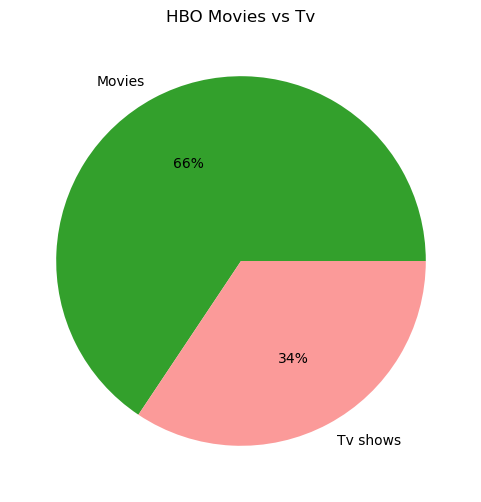

Number of countries HBO movies are available in: 75
Number of countries HBO tv shows are available in: 75


In [30]:
# Pie chart -> shows the different type of shows in HBO.
len(hbo_cleaned_movie)
#3535
len(hbo_cleaned_tv)
#1851

plt.figure(figsize=(6, 6))
colors = sns.color_palette("Paired")[3:6]

data = [3535, 1851]
labels = ['Movies', 'Tv shows']

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('HBO Movies vs Tv')
plt.show()

movie_num_countries = movie_countries_cleaned['available_countries'].nunique()
tv_num_countries = tv_countries_cleaned['available_countries'].nunique()
print('Number of countries HBO movies are available in:', movie_num_countries)
print('Number of countries HBO tv shows are available in:', movie_num_countries)

## Available Countires Analysis

In [31]:
#display(movie_countries_freq.head(3))
#display(tv_countries_freq.head(3))

movie_available_countries = movie_countries_cleaned.drop_duplicates('title')
tv_available_countries = tv_countries_cleaned.drop_duplicates('title')
#display(movie_available_countries.head(3))
#display(tv_available_countries.head(3))

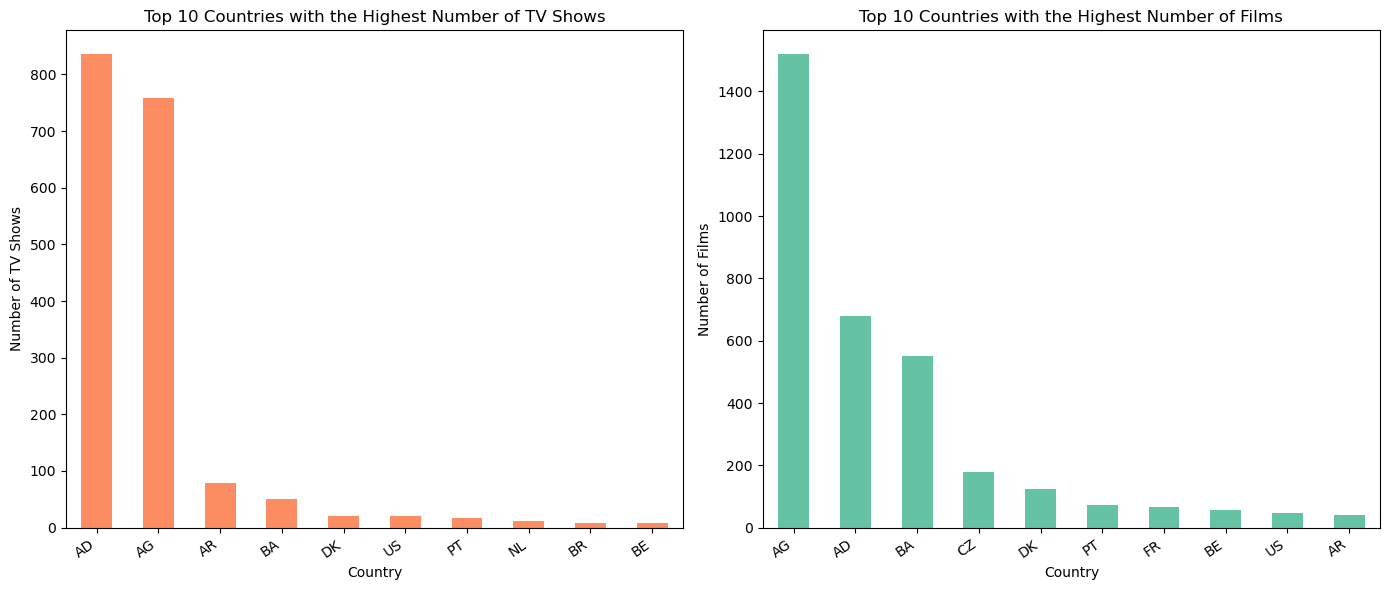

In [32]:

film_colour = '#66c2a5'
tv_colour = '#fc8d62'

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# TV
top_countries_tv = tv_available_countries['available_countries'].value_counts().head(10)
top_countries_tv.plot(kind='bar', ax=axes[0], color=tv_colour)
axes[0].set_title('Top 10 Countries with the Highest Number of TV Shows')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Number of TV Shows')
axes[0].set_xticklabels(labels=list(top_countries_tv.index), rotation=35, ha='right')

# Film
top_countries_film = movie_countries_freq['available_countries'].value_counts().head(10)
top_countries_film.plot(kind='bar', ax=axes[1],  color=film_colour)
axes[1].set_title('Top 10 Countries with the Highest Number of Films')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Number of Films')
axes[1].set_xticklabels(labels=list(top_countries_film.index), rotation=35, ha='right')


plt.tight_layout()
plt.show()

### TV shows and movies country availabilities is based on licensing rights, region/country content laws and shows/movies success rates

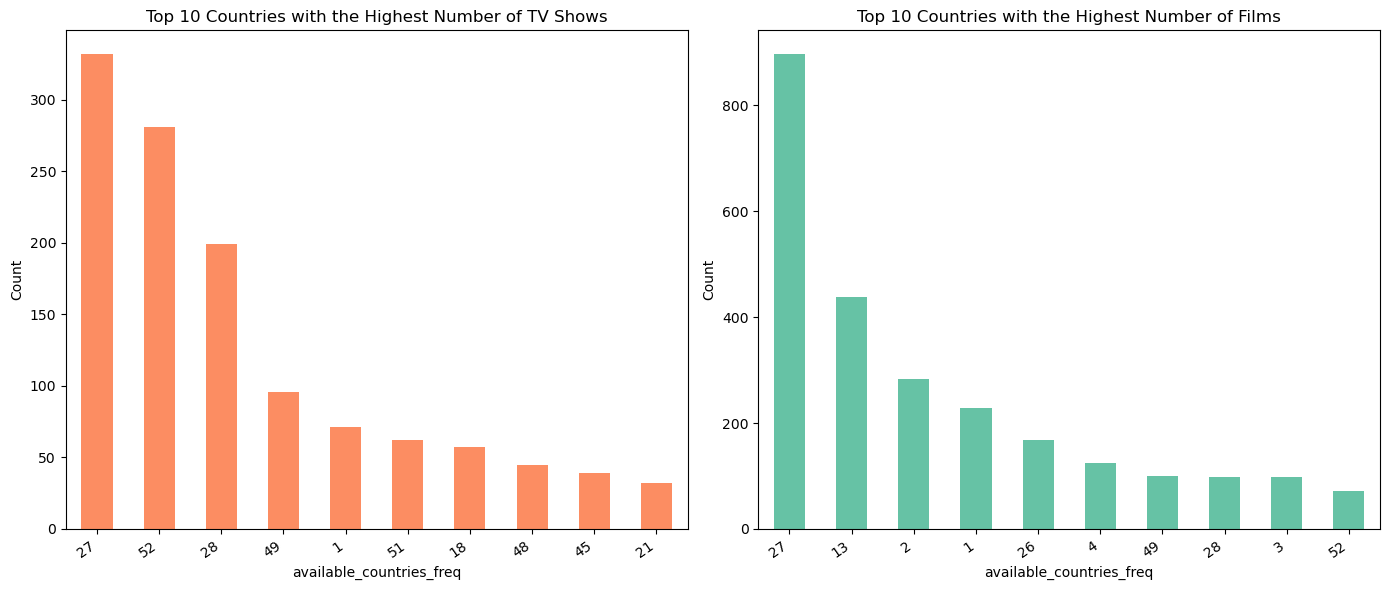

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# TV
top_countries_tv = tv_countries_freq['available_countries_freq'].value_counts().head(10)
top_countries_tv.plot(kind='bar', ax=axes[0], color=tv_colour)
axes[0].set_title('Top 10 Countries with the Highest Number of TV Shows')
axes[0].set_xlabel('available_countries_freq')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(labels=list(top_countries_tv.index), rotation=35, ha='right')

# Film
top_countries_film = movie_available_countries['available_countries_freq'].value_counts().head(10)
top_countries_film.plot(kind='bar', ax=axes[1],  color=film_colour)
axes[1].set_title('Top 10 Countries with the Highest Number of Films')
axes[1].set_xlabel('available_countries_freq')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(labels=list(top_countries_film.index), rotation=35, ha='right')


plt.tight_layout()
plt.show()

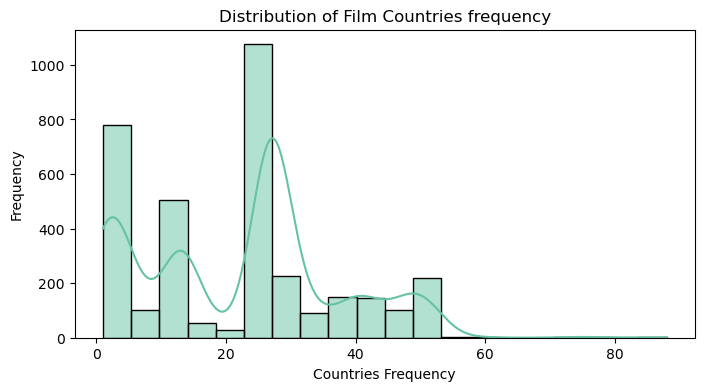

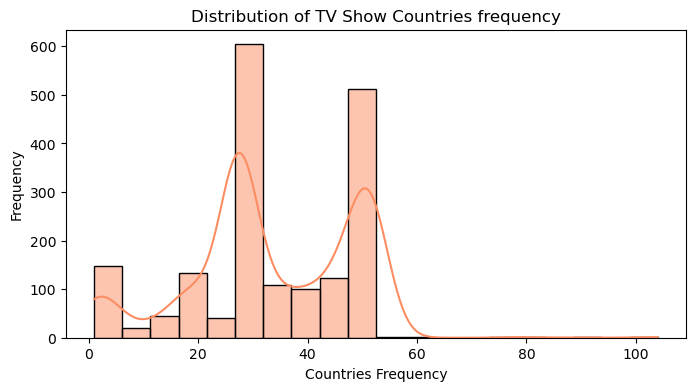

Movie available countries freq mean is : 22.28
Tv show available countries freq mean is : 33.29
Movie available countries freq mode is : 27
Tv show available countries freq mode is : 27
Movie available countries freq max is : 88
Tv show available countries freq max is : 104
Movie available countries freq min is : 1
Tv show available countries freq min is : 1


In [34]:

# Film Dist
plt.figure(figsize=(8, 4))
sns.histplot(movie_available_countries['available_countries_freq'], bins=20, kde=True, color=film_colour)
plt.title('Distribution of Film Countries frequency')
plt.xlabel('Countries Frequency')
plt.ylabel('Frequency')
plt.show()

# TV Dist
plt.figure(figsize=(8, 4))
sns.histplot(tv_countries_freq['available_countries_freq'], bins=20, kde=True, color=tv_colour)
plt.title('Distribution of TV Show Countries frequency')
plt.xlabel('Countries Frequency')
plt.ylabel('Frequency')
plt.show()

#stats_1_movie = hbo_cleaned_movie[hbo_cleaned_movie['rating'].notna()]
#stats_1_tv = hbo_cleaned_tv[hbo_cleaned_tv['rating'].notna()]
stats_movie = list(movie_available_countries['available_countries_freq'])
stats_tv = list(tv_countries_freq['available_countries_freq'])

x = round(statistics.mean(stats_movie), 2)
print("Movie available countries freq mean is :", x)
x = round(statistics.mean(stats_tv), 2)
print("Tv show available countries freq mean is :", x)

x = statistics.mode(stats_movie)
print("Movie available countries freq mode is :", x)
x = statistics.mode(stats_tv)
print("Tv show available countries freq mode is :", x)

x = max(stats_movie)
print("Movie available countries freq max is :", x)
x = max(stats_tv)
print("Tv show available countries freq max is :", x)


x = min(stats_movie)
print("Movie available countries freq min is :", x)
x = min(stats_tv)
print("Tv show available countries freq min is :", x)

## Genres Analysis

In [35]:
#display(movie_genre_cleaned.head(3))
#display(tv_genre_cleaned.head(3))

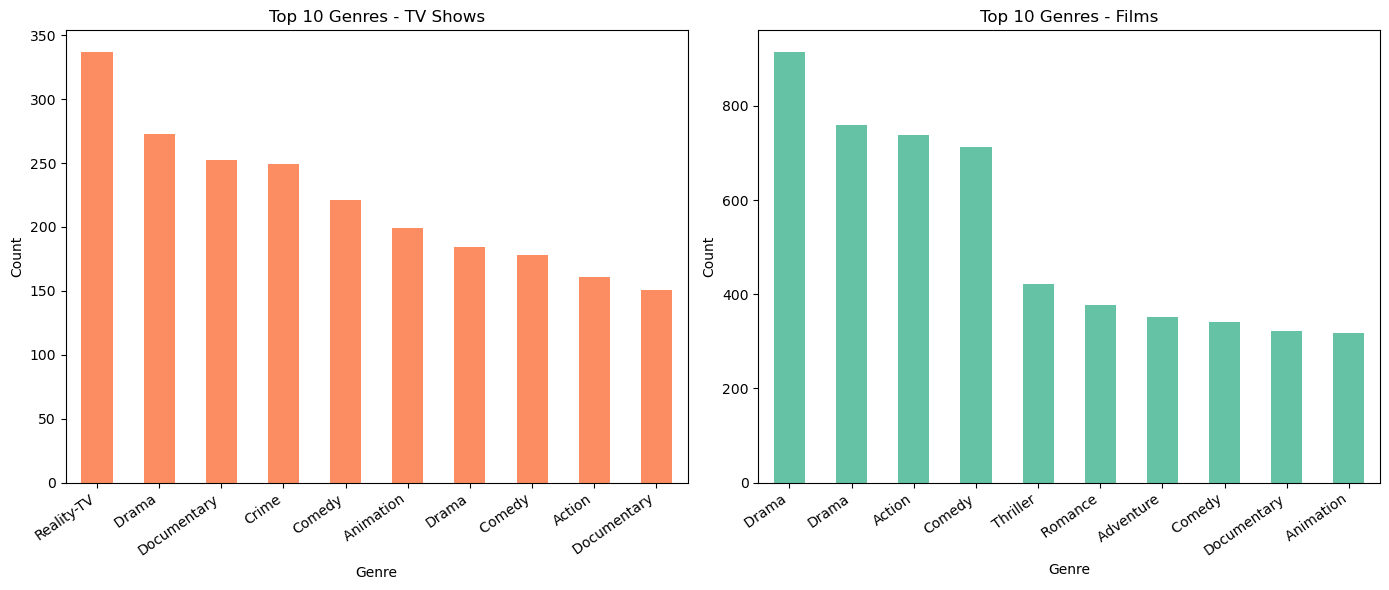

In [36]:
#Genres
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# TV
top_genres_tv = tv_genre_cleaned['genres'].value_counts().head(10)
top_genres_tv.plot(kind='bar', ax=axes[0], color=tv_colour)
axes[0].set_title('Top 10 Genres - TV Shows')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(labels=list(top_genres_tv.index), rotation=35, ha='right')

# Film
top_genres_film = movie_genre_cleaned['genres'].value_counts().head(10)
top_genres_film.plot(kind='bar', ax=axes[1],  color=film_colour)
axes[1].set_title('Top 10 Genres - Films')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(labels=list(top_genres_film.index), rotation=35, ha='right')


plt.tight_layout()
plt.show()

### The most common tv show genre in HBO is Reality TV.
### The most common film genre in HBO is Drama.

## Ratings

In [37]:
#need to remove the null values as I am analysing the rating and release year.
hbo_cleaned_movie['release_year'] = hbo_cleaned_movie['release_year'].astype(float)
hbo_cleaned_tv['release_year'] = hbo_cleaned_tv['release_year'].astype(float)


                                                                      

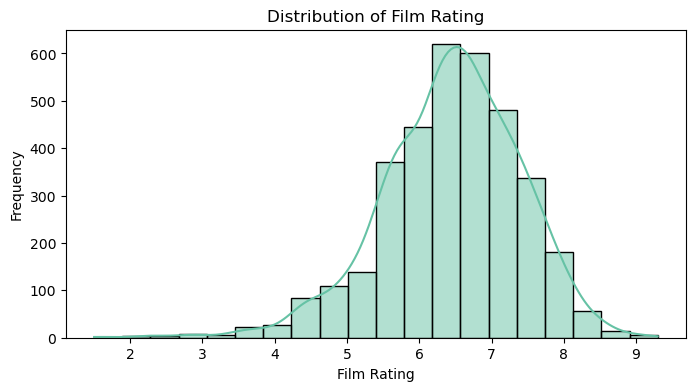

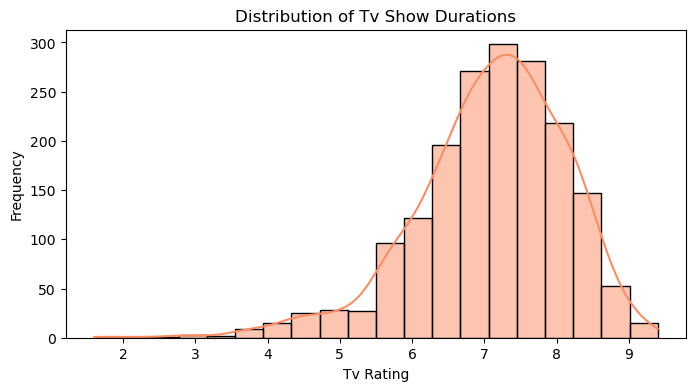

Movie rating mean is : 6.44
Tv show rating mean is : 7.09
Movie rating mode is : 6.6
Tv show rating mode is : 7.6
Movie rating max is : 9.3
Tv show rating max is : 9.4
Movie rating min is : 1.5
Tv show rating min is : 1.6


In [38]:
plt.figure(figsize=(8, 4))
sns.histplot(hbo_cleaned_movie['rating'], bins=20, kde=True, color=film_colour)
plt.title('Distribution of Film Rating')
plt.xlabel('Film Rating')
plt.ylabel('Frequency')
plt.show()

# Film Dist
plt.figure(figsize=(8, 4))
sns.histplot(hbo_cleaned_tv['rating'], bins=20, kde=True, color=tv_colour)
plt.title('Distribution of Tv Show Durations')
plt.xlabel('Tv Rating')
plt.ylabel('Frequency')
plt.show()

stats_1_movie = hbo_cleaned_movie[hbo_cleaned_movie['rating'].notna()]
stats_1_tv = hbo_cleaned_tv[hbo_cleaned_tv['rating'].notna()]
stats_1_movie = list(stats_1_movie['rating'])
stats_1_tv = list(stats_1_tv['rating'])

x = round(statistics.mean(stats_1_movie), 2)
print("Movie rating mean is :", x)
x = round(statistics.mean(stats_1_tv), 2)
print("Tv show rating mean is :", x)

x = statistics.mode(stats_1_movie)
print("Movie rating mode is :", x)
x = statistics.mode(stats_1_tv)
print("Tv show rating mode is :", x)

x = max(stats_1_movie)
print("Movie rating max is :", x)
x = max(stats_1_tv)
print("Tv show rating max is :", x)


x = min(stats_1_movie)
print("Movie rating min is :", x)
x = min(stats_1_tv)
print("Tv show rating min is :", x)

## Release Year

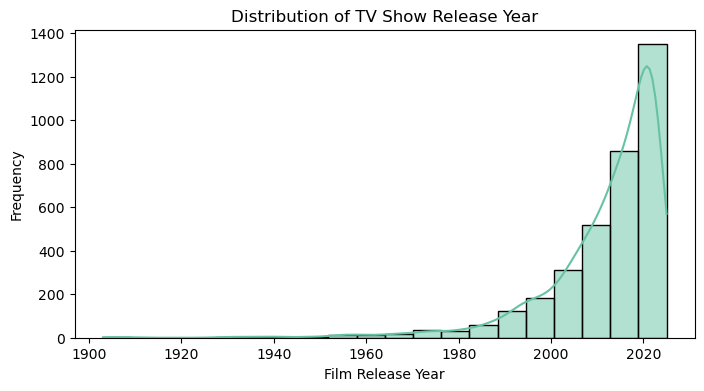

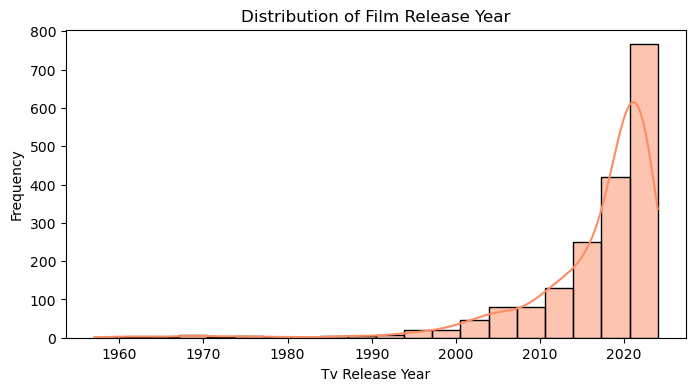

Most recent movie release year : 2025.0
Most recent tv show release year : 2024.0
Oldest movie release year: 1903.0
Oldest tv show release year : 1957.0


In [39]:
plt.figure(figsize=(8, 4))
sns.histplot(hbo_cleaned_movie['release_year'], bins=20, kde=True, color=film_colour)
plt.title('Distribution of TV Show Release Year')
plt.xlabel('Film Release Year')
plt.ylabel('Frequency')
plt.show()

# Film Dist
plt.figure(figsize=(8, 4))
sns.histplot(hbo_cleaned_tv['release_year'], bins=20, kde=True, color=tv_colour)
plt.title('Distribution of Film Release Year')
plt.xlabel('Tv Release Year')
plt.ylabel('Frequency')
plt.show()

stats_2_movie = hbo_cleaned_movie[hbo_cleaned_movie['release_year'].notna()]
stats_2_tv = hbo_cleaned_tv[hbo_cleaned_tv['release_year'].notna()]
stats_2_movie = list(stats_2_movie['release_year'])
stats_2_tv = list(stats_2_tv['release_year'])

x = max(stats_2_movie)
print("Most recent movie release year :", x)
x = max(stats_2_tv)
print("Most recent tv show release year :", x)


x = min(stats_2_movie)
print("Oldest movie release year:", x)
x = min(stats_2_tv)
print("Oldest tv show release year :", x)

## Ratings and Year analysis

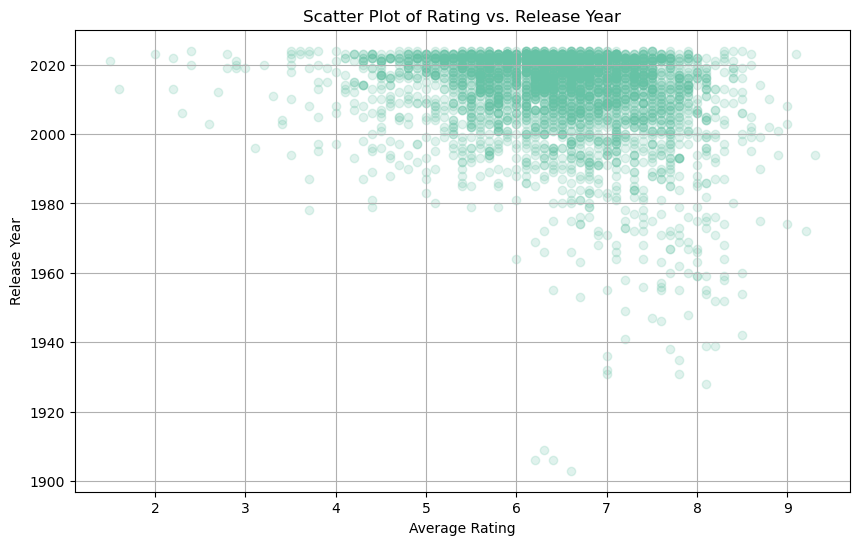

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(hbo_cleaned_movie['rating'], hbo_cleaned_movie['release_year'], alpha=0.2, color=film_colour)
plt.title('Scatter Plot of Rating vs. Release Year')
plt.xlabel('Average Rating')
plt.ylabel('Release Year')
plt.grid(True)
plt.show()

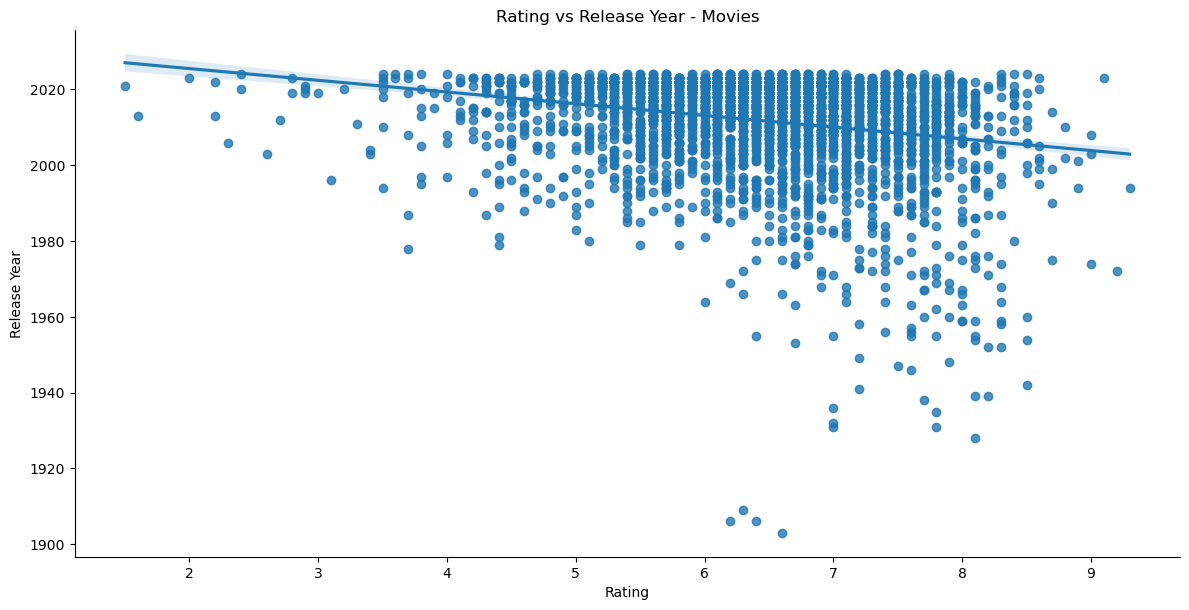

In [41]:


g = sns.lmplot(
    data=hbo_cleaned_movie,
    x='rating', y='release_year', col=None,
    height=6, aspect=2
    ).set(title='Rating vs Release Year - Movies')

g.set_axis_labels("Rating", "Release Year")
plt.show()

### Older movies which HBO might have bought rights to tend to have high rating, compared to their newer movies.

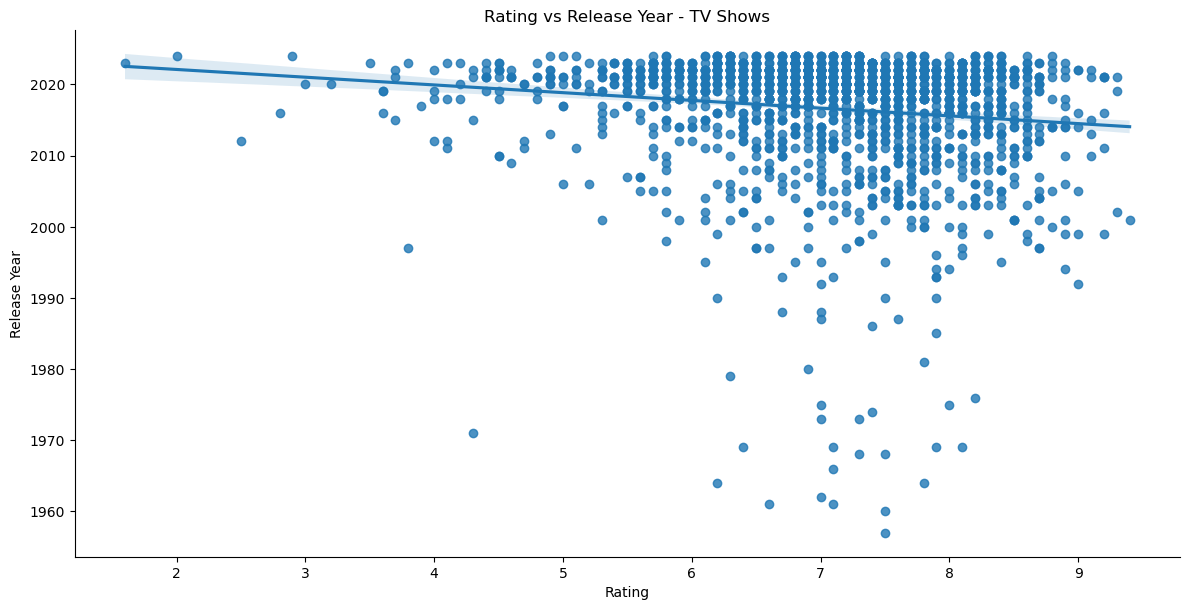

In [42]:
g = sns.lmplot(
    data=hbo_cleaned_tv,
    x='rating', y='release_year', col=None,
    height=6, aspect=2
    ).set(title='Rating vs Release Year - TV Shows')

g.set_axis_labels("Rating", "Release Year")
plt.show()

### Older tv shows which HBO might have bought rights to tend to have high rating, compared to their newer tv shows.